In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
customer_data = pd.read_csv("C:\\Users\\speru\\OneDrive\\Desktop\\python_vs\\bank_transactions.csv")

In [5]:
customer_data.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
546506,T546507,C5610050,5/11/92,M,GURGAON,18297.41,23/8/16,102055,2179.0
844244,T844245,C6974324,1/1/1800,M,AHMEDABAD,18129.40,9/9/16,153928,504.3
49028,T49029,C1041168,17/2/94,M,HOSUR,71.15,3/8/16,135649,1023.0


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [7]:
customer_data.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'}, inplace=True)
customer_data.sample(1)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
152795,T152796,C4515251,8/3/90,M,NALGONDA,4.81,4/8/16,123908,1093.0


In [8]:
customer_data1 = customer_data.copy()
customer_data1['CustomerDOB'] = pd.to_datetime(customer_data['CustomerDOB'])
customer_data1['TransactionDate'] = pd.to_datetime(customer_data['TransactionDate'])
customer_data1.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
699656,T699657,C8616564,1986-01-18,M,BANGALORE,102022.06,2016-08-30,171634,37.0
378626,T378627,C5930261,1995-03-09,F,NEW DELHI,13.30,2016-08-13,143627,96.0
1035992,T1035993,C8358158,1989-08-11,M,JALAUN,7.87,2016-09-18,171611,1050.0


In [9]:
customer_data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [10]:
from datetime import datetime
today = datetime.today().year
customer_data1['Age'] = today - customer_data1['CustomerDOB'].dt.year
customer_data1.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
172958,T172959,C5240657,1985-09-07,F,NEW DELHI,42614.14,2016-04-08,191743,140.00,39.0
596901,T596902,C1628737,1995-10-24,M,JUBBAL,19620.05,2016-08-27,212049,312.00,29.0
1035816,T1035817,C2245388,1985-05-15,M,KOTTAYAM,13403.74,2016-09-18,164515,553.04,39.0


In [11]:
customer_data2 = customer_data1[customer_data1['Age'].between(18, 90)]
print(customer_data1.shape)
print(customer_data2.shape)

(1048567, 10)
(893367, 10)


In [12]:
customer_data2.isna().sum()

TransactionID            0
CustomerID               0
CustomerDOB              0
CustGender              13
CustLocation           111
CustAccountBalance    1990
TransactionDate          0
TransactionTime          0
TransactionAmount        0
Age                      0
dtype: int64

In [13]:
customer_data3 = customer_data2.dropna()
customer_data3.shape

(891253, 10)

In [14]:
customer_data3.duplicated().sum()

np.int64(0)

In [15]:
customer_data3.isnull().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
Age                   0
dtype: int64

In [16]:
len(customer_data3['TransactionID'].unique())

891253

In [17]:
len(customer_data3['CustomerID'].unique())

769988

In [18]:
customer_data4 = customer_data3.drop_duplicates(subset='CustomerID')
customer_data4.shape

(769988, 10)

In [19]:
customer_data5 = customer_data4.drop(columns = ['TransactionID', 'CustomerID', 'CustomerDOB'])
customer_data5.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
575201,M,IMPHAL,3984.40,2016-08-22,210904,35.00,38.0
132659,M,NEW DELHI,5554571.47,2016-06-08,195010,1000.00,37.0
74314,M,THANE,46043.68,2016-02-08,204921,2310.02,39.0


In [20]:
customer_data5.Age.dtype

dtype('float64')

In [21]:
customer_data5['Age'] = customer_data5['Age'].astype('int64')
print(customer_data5['Age'].dtype)

int64


In [22]:
customer_data5.describe(include = 'object')

,CustGender,CustLocation
count,769988,769988
unique,2,7347
top,M,MUMBAI
freq,556541,75992


In [23]:
print(customer_data5.CustGender.value_counts(normalize = True) * 100)
print(customer_data5.CustGender.value_counts())

CustGender
M    72.279178
F    27.720822
Name: proportion, dtype: float64
CustGender
M    556541
F    213447
Name: count, dtype: int64


In [24]:
value_counts = customer_data5['CustLocation'].value_counts()
value_counts_customer_data = value_counts.reset_index()
value_counts_customer_data.columns = ['CustLocation', 'ValueCounts']
value_counts_customer_data

,CustLocation,ValueCounts
0,MUMBAI,75992
1,BANGALORE,61860
2,NEW DELHI,57755
3,GURGAON,55141
4,DELHI,52847
...,...,...
7342,LAXMI NAGAR HYDERABAD,1
7343,ASSAM NEAR SBI JORHAT,1
7344,ROAD HADAPSAR PUNE,1
7345,MARDOL,1


In [25]:
locations = value_counts_customer_data[value_counts_customer_data.ValueCounts.between(1000,75992)]
locations_arr = list(locations.CustLocation)
locations_arr

['MUMBAI',
 'BANGALORE',
 'NEW DELHI',
 'GURGAON',
 'DELHI',
 'NOIDA',
 'CHENNAI',
 'PUNE',
 'HYDERABAD',
 'THANE',
 'KOLKATA',
 'GHAZIABAD',
 'NAVI MUMBAI',
 'AHMEDABAD',
 'FARIDABAD',
 'JAIPUR',
 'CHANDIGARH',
 'LUCKNOW',
 'MOHALI',
 'SURAT',
 'NASHIK',
 'LUDHIANA',
 'VISAKHAPATNAM',
 'DEHRADUN',
 'INDORE',
 'AMRITSAR',
 'KANPUR',
 'VADODARA',
 'AGRA',
 'MEERUT',
 'NAGPUR',
 'GREATER NOIDA',
 'COIMBATORE',
 'AURANGABAD',
 'RANGA REDDY',
 'PANCHKULA',
 'GUNTUR',
 'GUWAHATI',
 'JALANDHAR',
 'BHOPAL',
 'PATNA',
 'UDAIPUR',
 'REWARI',
 'RANCHI',
 'BENGALURU',
 'HOWRAH',
 'PATIALA',
 'ALWAR',
 'NORTH 24 PARGANAS',
 'SONIPAT',
 'ERNAKULAM',
 'SECUNDERABAD',
 'ALLAHABAD',
 'BAMBOLIM',
 'PANIPAT',
 'SILIGURI',
 'ZIRAKPUR',
 'KOLHAPUR',
 'RAJKOT',
 'BAREILLY',
 'KANGRA',
 'ALIGARH',
 'RAIPUR',
 'JAMSHEDPUR',
 'WARANGAL',
 'KARNAL',
 'AMBALA',
 'KOTTAYAM',
 'KHARAR',
 'MANGALORE',
 'HOSUR',
 'SAHARANPUR',
 'SAS NAGAR']

In [26]:
customer_data6 = customer_data5[customer_data5.CustLocation.isin(locations_arr)]
print(customer_data5.shape)
print(customer_data6.shape)

(769988, 7)
(578307, 7)


In [27]:
customer_data6.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
136860,M,HYDERABAD,4179.11,2016-05-08,141749,1599.0,40
454090,M,FARIDABAD,27163.46,2016-08-16,222326,500.0,36
892565,M,THANE,70.02,2016-07-09,143951,150.0,33


# Exploratory Data Analysis (EDA)

In [28]:
customer_data6.groupby('CustGender')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])

CustAccountBalance                            TransactionAmount  \
                          min          max          mean               min   
CustGender                                                                   
F                         0.0  12343905.63  80541.452194               0.0   
M                         0.0  36090853.96  89211.210854               0.0   

                                     
                   max         mean  
CustGender                           
F           1380002.88  1503.570805  
M           1560034.99  1247.715115

In [29]:
customer_data6.groupby('Age')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])

CustAccountBalance                             TransactionAmount  \
                   min          max           mean               min   
Age                                                                    
18             1878.39    116515.21   50251.678824              25.0   
19             1002.83    378325.52   78735.889231              25.0   
20                0.00     71139.38   11102.906923              10.0   
21                4.66    116516.02   17515.201500              85.0   
22               29.43    247140.63   26773.087037               0.0   
23                5.37    278337.10   17395.460000               0.0   
24               63.96    413680.87   41085.236687               1.0   
25               15.76    424880.72   27416.726353               1.0   
26                0.44  10268800.62   33686.369099               0.0   
27                0.00   2089425.75   30175.013437               0.0   
28                0.00   2249370.54   35458.685206               0.0   
29                0.00   3135444.31   29299.459946               0.0   
30                0.00   1497456.64   25735.377603               0.0   
31                0.00   6903931.76   35365.514844               0.0   
32                0.00   6153347.84   44391.418074               0.0   
33                0.00  16834937.99   45606.090107               0.0   
34                0.00   6464804.71   49145.090991               0.0   
35                0.00   9198576.98   73676.424802               0.0   
36                0.00  11091701.10   68586.620405               0.0   
37                0.00  14276260.10   84968.421078               0.0   
38                0.00  12343905.63   89211.896553               0.0   
39                0.00   9475590.98   87279.707334               0.0   
40                0.00  15715987.76  110538.884400               0.0   
41                0.00  15436498.08  101526.987421               0.0   
42                0.00   9141893.63  115158.344417               0.0   
43                0.00  27979586.92  144489.165890               0.0   
44                0.00   7271335.09  163322.964685               0.0   
45                0.00  10546545.67  146618.309706               0.0   
46                0.00  14472840.56  166044.544087               0.0   
47                0.00   6994347.73  177770.250744               0.0   
48                0.00  12744388.47  186975.420276               0.0   
49                0.00  15158474.07  216454.824309               0.0   
50                0.00  36090853.96  301495.664521               0.0   

                              
            max         mean  
Age                           
18      5787.69  2775.446471  
19     28750.00  2830.300000  
20     11696.00  1550.336410  
21     10906.00  1991.400000  
22     26964.00  2950.589444  
23     51350.00  1886.032889  
24      7238.00   870.921718  
25    100742.00  1353.858798  
26     56368.23  1393.633718  
27    200001.24   947.629806  
28     63826.00   807.693739  
29     93500.00   750.336117  
30    158134.00   792.703477  
31    350000.00   963.499894  
32    310002.83   887.389557  
33    108700.74   947.504270  
34    150000.00  1054.573369  
35    600003.45  1165.595011  
36    600008.32  1261.731278  
37    314694.08  1309.703136  
38    265414.00  1374.449535  
39    720001.16  1464.749208  
40    168192.00  1626.104287  
41    561001.00  1593.706800  
42    278800.18  1646.246131  
43    525003.83  1690.049807  
44    133519.00  1751.643265  
45    247832.00  1981.436102  
46   1380002.88  1882.953300  
47    514320.00  2013.897292  
48   1560034.99  2229.708158  
49    200000.00  1971.652297  
50    299009.96  2343.893089

In [30]:
customer_data7 = customer_data6.copy()
customer_data7['BalTransRatio'] = customer_data7['TransactionAmount']/customer_data7['CustAccountBalance']
customer_data7.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,BalTransRatio
579771,M,GHAZIABAD,262759.95,2016-08-22,210551,6293.00,47,0.023950
777760,M,CHANDIGARH,3188.18,2016-06-09,165316,42.00,30,0.013174
619898,M,NEW DELHI,74407.91,2016-08-26,145518,264.27,40,0.003552


In [31]:
customer_data7.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,inf,inf
M,0.0,inf,inf


In [32]:
customer_data7.replace([np.inf, -np.inf], np.nan, inplace=True)
customer_data7.dropna(subset=['CustAccountBalance', 'TransactionAmount', 'Age', 'BalTransRatio'], inplace=True)

In [33]:
customer_data7.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,1571500.0,55.219362
M,0.0,900000.0,32.329424


In [34]:
more = customer_data7[customer_data7.TransactionAmount > customer_data7.CustAccountBalance]
more.shape

(54797, 8)

In [35]:
customer_data8 = customer_data7[~(customer_data7.TransactionAmount > customer_data7.CustAccountBalance)]
print(customer_data7.shape)
print(customer_data8.shape)

(577335, 8)
(522538, 8)


In [36]:
customer_data8.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,1.0,0.074564
M,0.0,1.0,0.077845


In [37]:
customer_data8.groupby('Age')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
Age,,,
18,0.000450,0.204324,0.057026
19,0.000464,0.840511,0.174014
20,0.000317,0.969915,0.214068
21,0.005272,0.771040,0.326429
22,0.000000,0.822211,0.161144
23,0.000000,0.716455,0.159008
24,0.000058,0.896939,0.131248
25,0.000048,0.991744,0.110555
26,0.000000,0.984362,0.076162


## Data Visualization

In [38]:
customer_data8.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount', 'Age', 'BalTransRatio'],
      dtype='object')

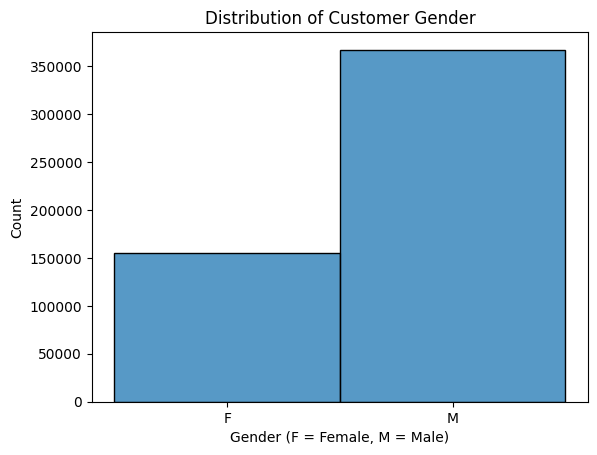

In [39]:
sns.histplot(data=customer_data8, x='CustGender', bins=2, kde=False)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender (F = Female, M = Male)')
plt.ylabel('Count')
plt.show()

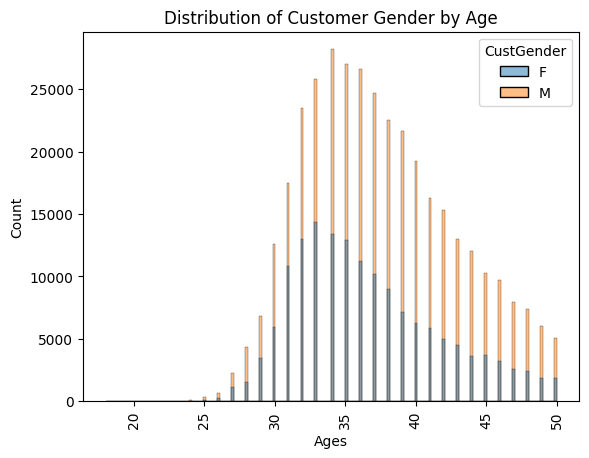

In [40]:
sns.histplot(data=customer_data8, x='Age', hue='CustGender', kde=False)
plt.title('Distribution of Customer Gender by Age')
plt.xlabel('Ages')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

The gap between man and female become significatly larger from the age of 36 going forward

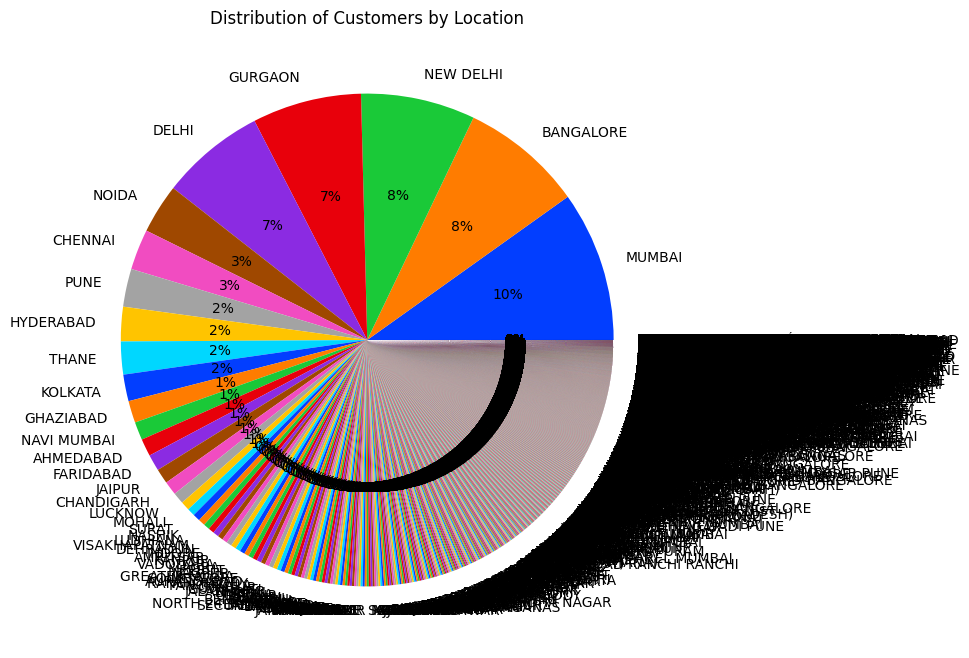

In [41]:
plt.figure(figsize=(8, 8))  
sns.set_palette('bright')  
plt.pie(x=value_counts.values, labels=value_counts.index, autopct='%.0f%%')
plt.title('Distribution of Customers by Location')
plt.show()

In [42]:
customer_data8.drop('TransactionTime', axis = 1, inplace = True)
customer_data8.sample(1)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Age,BalTransRatio
469583,F,BANGALORE,32180.42,2016-08-21,252.0,37,0.007831


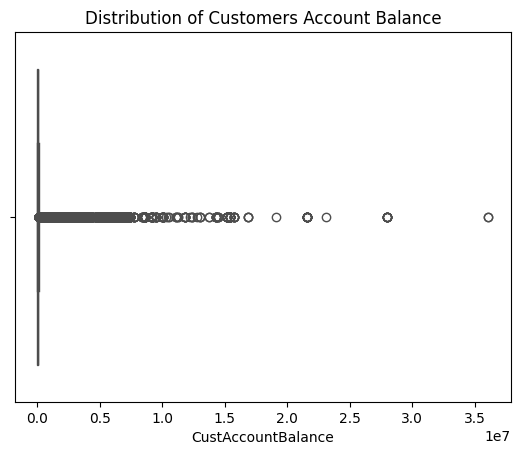

In [43]:
sns.boxplot(customer_data8, x = 'CustAccountBalance')
plt.title('Distribution of Customers Account Balance')
plt.show()

In [44]:
from scipy.stats.mstats import winsorize

customer_data9 = customer_data8.copy()
customer_data9 = customer_data9[customer_data9['CustAccountBalance'].isin(winsorize(customer_data9['CustAccountBalance'], limits = (0, 0.25)))]
print(customer_data8.shape)
print(customer_data9.shape)

(522538, 7)
(522538, 7)


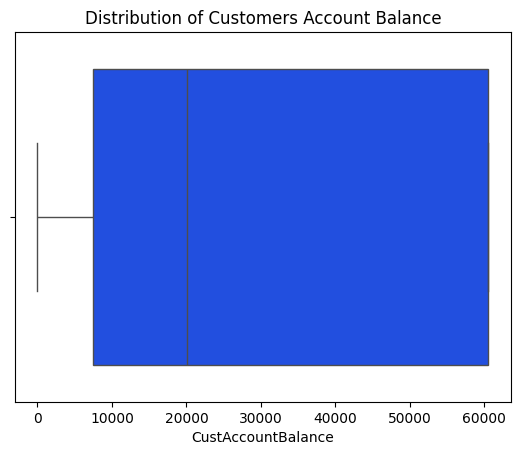

In [45]:
sns.boxplot(customer_data9, x = 'CustAccountBalance')
plt.title('Distribution of Customers Account Balance')
plt.show()

In [46]:
customer_data8.CustAccountBalance.describe()

count    5.225380e+05
mean     9.583025e+04
std      4.128592e+05
min      2.000000e-02
25%      7.410190e+03
50%      2.013528e+04
75%      6.053530e+04
max      3.609085e+07
Name: CustAccountBalance, dtype: float64

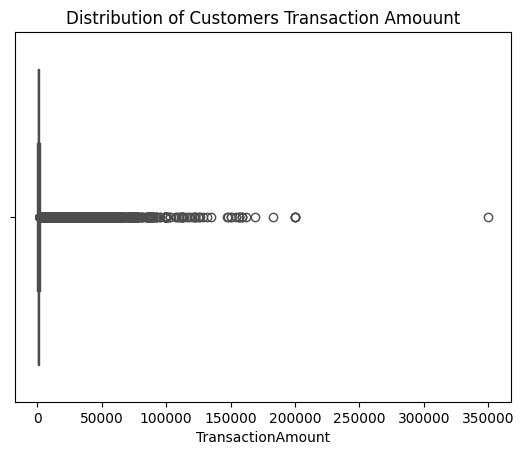

In [47]:
sns.boxplot(customer_data8, x = 'TransactionAmount')
plt.title('Distribution of Customers Transaction Amouunt')
plt.show()

In [48]:
customer_data10 = customer_data9.copy()
customer_data10 = customer_data10[customer_data10['TransactionAmount'].isin(winsorize(customer_data10['TransactionAmount'], limits = (0.25, 0.25)))]
print(customer_data9.shape)
print(customer_data10.shape)

(522538, 7)
(522538, 7)


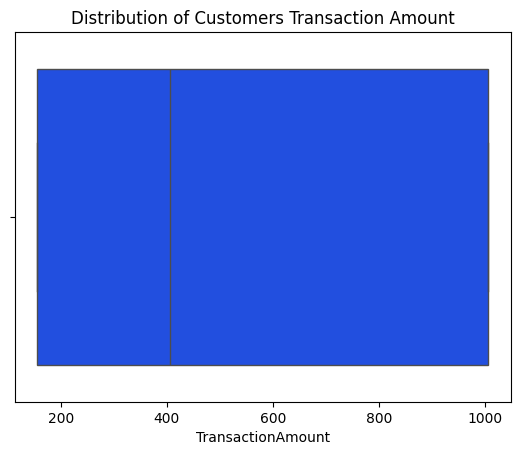

In [49]:
sns.boxplot(customer_data10, x = 'TransactionAmount')
plt.title('Distribution of Customers Transaction Amount')
plt.show()

In [50]:
customer_data9.TransactionAmount.describe()

count    522538.000000
mean       1160.113848
std        3584.162190
min           0.000000
25%         156.000000
50%         406.000000
75%        1005.860000
max      350000.000000
Name: TransactionAmount, dtype: float64

In [51]:
customer_data10['TransactionMonth'] = customer_data10['TransactionDate'].dt.month
customer_data10.sample()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Age,BalTransRatio,TransactionMonth
825594,M,GHAZIABAD,26024.4,2016-04-09,1005.9,32,0.10982,4


In [52]:
customer_data10.drop("TransactionDate", axis = 1, inplace = True)
customer_data10.sample()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
596149,M,KOTTAYAM,125.85,156.0,38,0.794597,8


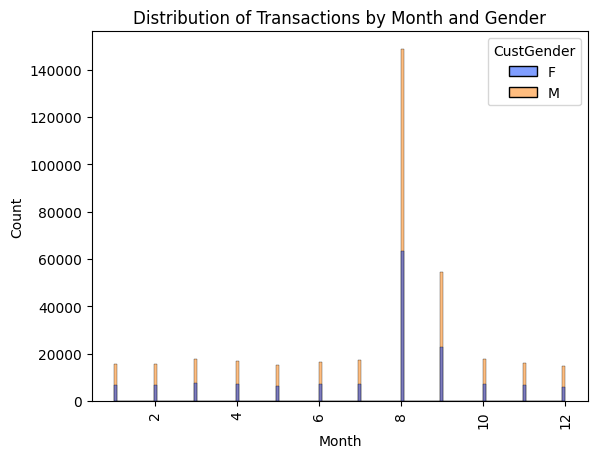

In [53]:
sns.histplot(data=customer_data10, x='TransactionMonth', hue='CustGender', kde=False)
plt.title('Distribution of Transactions by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

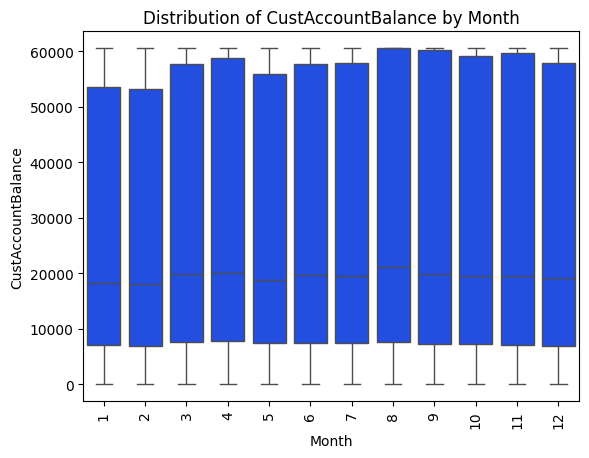

In [54]:
sns.boxplot(data=customer_data10, x='TransactionMonth', y='CustAccountBalance')
plt.title('Distribution of CustAccountBalance by Month')
plt.xlabel('Month')
plt.ylabel('CustAccountBalance')
plt.xticks(rotation=90)
plt.show()

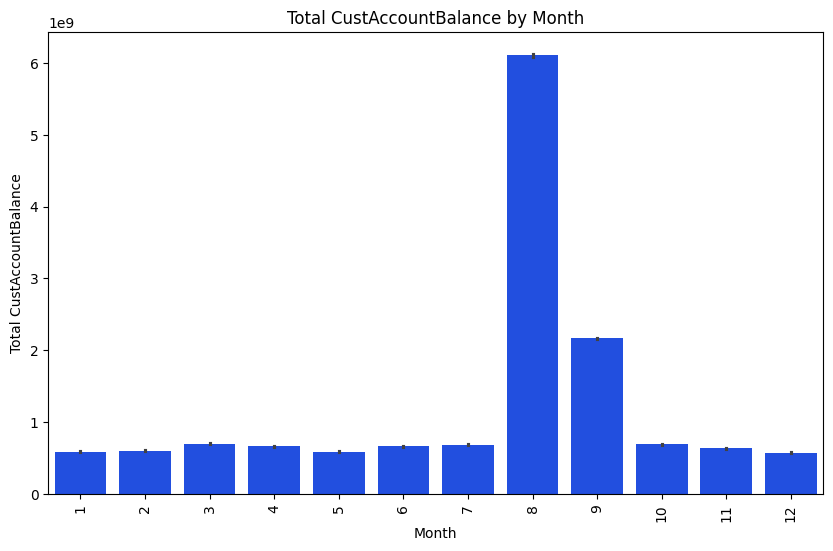

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_data10, x='TransactionMonth', y='CustAccountBalance', estimator=sum)
plt.title('Total CustAccountBalance by Month')
plt.xlabel('Month')
plt.ylabel('Total CustAccountBalance')
plt.xticks(rotation=90)
plt.show()

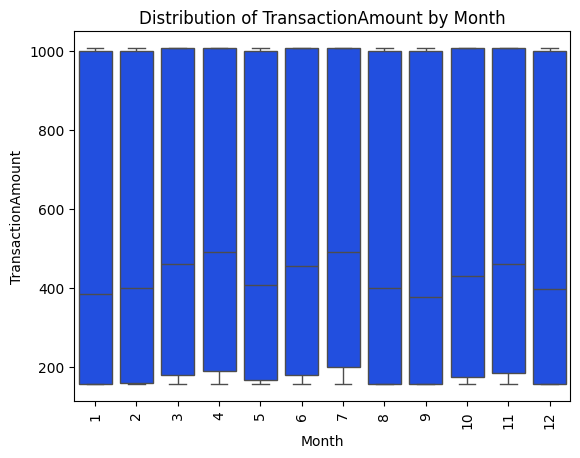

In [56]:
sns.boxplot(data=customer_data10, x='TransactionMonth', y='TransactionAmount')
plt.title('Distribution of TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('TransactionAmount')
plt.xticks(rotation=90)
plt.show()

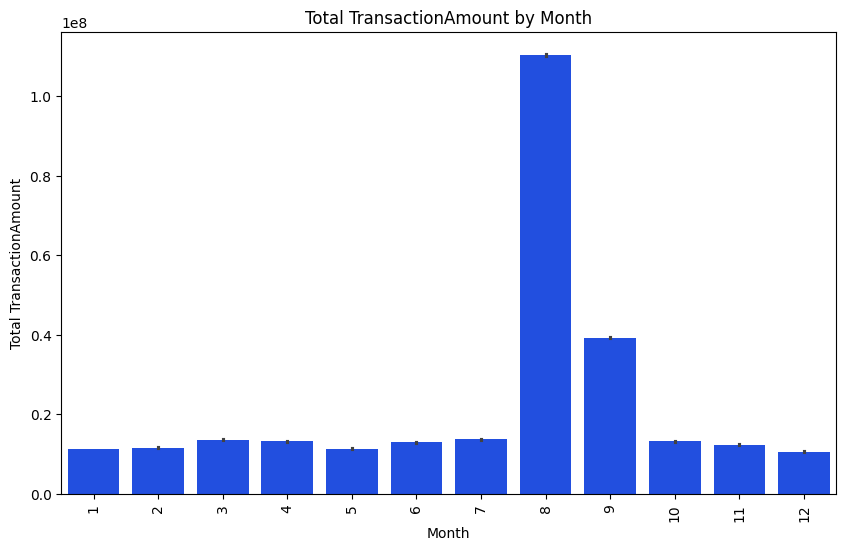

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_data10, x='TransactionMonth', y='TransactionAmount', estimator=sum)
plt.title('Total TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('Total TransactionAmount')
plt.xticks(rotation=90)
plt.show()

In [58]:
numerical = customer_data10[['CustAccountBalance','TransactionAmount','Age','BalTransRatio', 'TransactionMonth']]
corr_matrix = numerical.corr()
corr_matrix

,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
CustAccountBalance,1.000000,0.284358,0.240208,-0.388040,0.013724
TransactionAmount,0.284358,1.000000,0.225057,0.230419,-0.011144
Age,0.240208,0.225057,1.000000,-0.031473,-0.002669
BalTransRatio,-0.388040,0.230419,-0.031473,1.000000,-0.012856
TransactionMonth,0.013724,-0.011144,-0.002669,-0.012856,1.000000


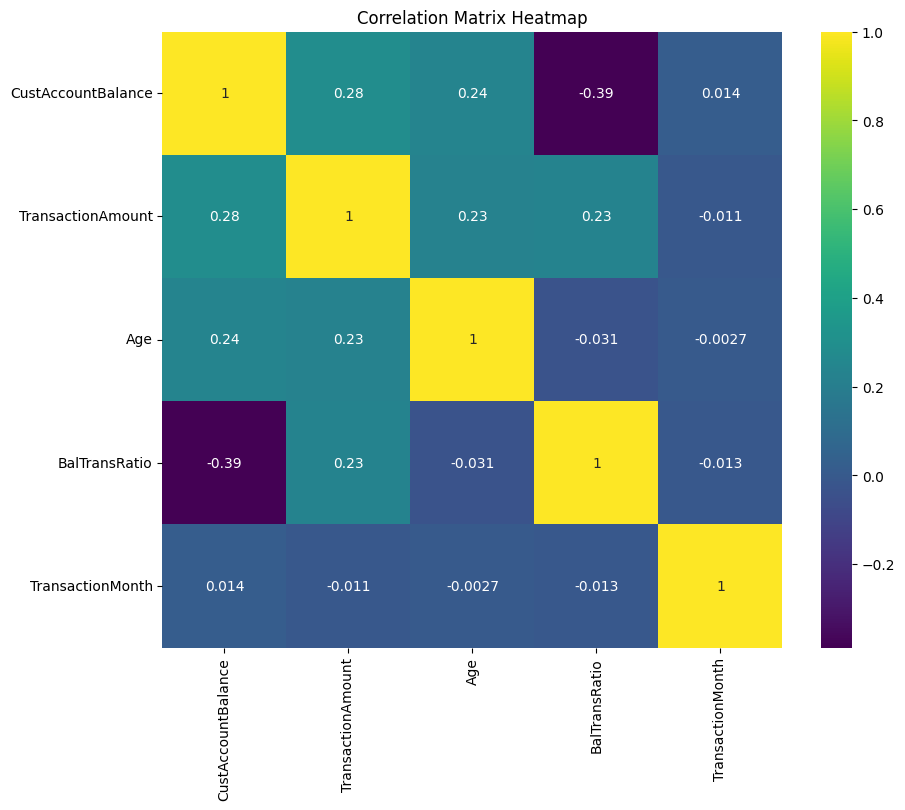

In [59]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
customer_data10['CustGender'] = encoder.fit_transform(customer_data10['CustGender'])
customer_data10.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
275963,1,MANGALORE,445.98,156.0,34,0.291493,11
521161,1,AHMEDABAD,60535.93,523.0,35,0.001577,8
644911,1,HYDERABAD,1551.84,156.0,40,0.007733,8


In [61]:
dummies = pd.get_dummies(customer_data10['CustLocation'])
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
331494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
643822,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
734443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
dummies = dummies.astype(int)
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
262566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
624324,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
customer_data11 = customer_data10.copy()
customer_data11 = customer_data11.merge(dummies, left_index = True, right_index = True)
customer_data11.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
229840,0,JAIPUR,1050.71,156.0,36,0.142761,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537194,1,CHENNAI,10000.04,664.0,37,0.066400,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523188,1,BANGALORE,24388.19,200.0,37,0.008201,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
customer_data11.drop('CustLocation', axis = 1, inplace = True)
customer_data11.sample(3)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
818754,0,19293.00,650.0,41,0.033691,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418089,1,60535.93,704.0,40,0.008310,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551712,1,9875.34,265.0,37,0.026835,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
customer_data11.describe()

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
count,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,...,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000,522538.000000
mean,0.702630,28069.813908,524.204535,37.231855,0.076870,7.293837,0.004513,0.015528,0.002059,0.002306,...,0.002622,0.002314,0.002584,0.006706,0.028212,0.003253,0.004601,0.005012,0.001879,0.002266
std,0.457101,22883.172578,351.641338,5.333510,0.149763,2.653265,0.067024,0.123640,0.045331,0.047966,...,0.051137,0.048045,0.050763,0.081614,0.165579,0.056945,0.067672,0.070618,0.043310,0.047547
min,0.000000,0.020000,156.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7410.190000,156.000000,33.000000,0.005691,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,20135.280000,406.000000,36.000000,0.019808,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60535.302500,1005.860000,41.000000,0.068058,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,60535.930000,1005.900000,50.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dimensionality Reduction

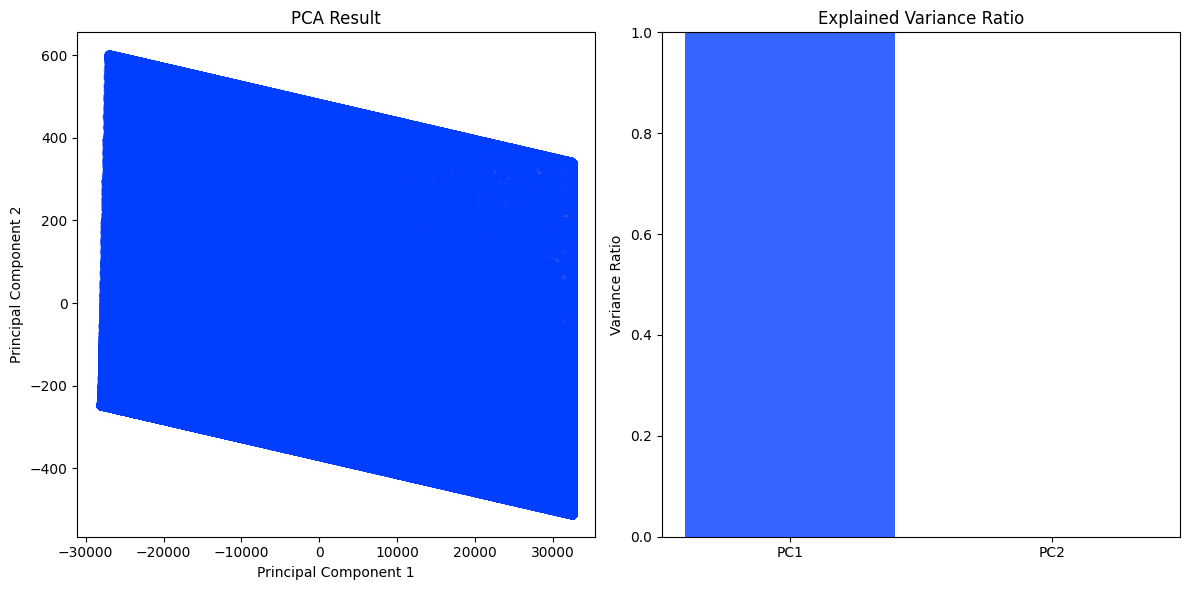

Explained variance ratio of PC1: 0.9997829437644442
Explained variance ratio of PC2: 0.00021699086678450604


In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_data11) 
customer_data_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

explained_variance_ratio = pca.explained_variance_ratio_

# Plotting PCA result
plt.figure(figsize=(12, 6))

# Scatter plot of PCA components
plt.subplot(1, 2, 1)
plt.scatter(customer_data_pca['PC1'], customer_data_pca['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Bar plot of explained variance ratios
plt.subplot(1, 2, 2)
plt.bar(['PC1', 'PC2'], explained_variance_ratio, alpha=0.8)
plt.title('Explained Variance Ratio')
plt.ylabel('Variance Ratio')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print(f'Explained variance ratio of PC1: {explained_variance_ratio[0]}')
print(f'Explained variance ratio of PC2: {explained_variance_ratio[1]}')


In [67]:
from scipy import stats

male_customers = customer_data11[customer_data11['CustGender'] == 0]['CustAccountBalance']
female_customers = customer_data11[customer_data11['CustGender'] == 1]['CustAccountBalance']
t_stat, p_value = stats.ttest_ind(male_customers, female_customers)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance between male and female customers.")


T-statistic: 46.62308631597522
P-value: 0.0
Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.


In [68]:
from scipy import stats

male_customers = customer_data11[customer_data11['CustGender'] == 0]['TransactionAmount']
female_customers = customer_data11[customer_data11['CustGender'] == 1]['TransactionAmount']
t_stat, p_value = stats.ttest_ind(male_customers, female_customers)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average TransactionAmount between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average TransactionAmount between male and female customers.")


T-statistic: 60.96605795713229
P-value: 0.0
Reject the null hypothesis: There is a significant difference in average TransactionAmount between male and female customers.


In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare the data for ANOVA
# Group data by 'Age' and calculate the mean 'CustAccountBalance' for each month
anova_data = customer_data11[['CustAccountBalance', 'Age']]

# Perform ANOVA
model = ols('CustAccountBalance ~ C(Age)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

anova_table

,sum_sq,df,F,PR(>F)
Intercept,2.188836e+10,1.0,44.468343,2.587591e-11
C(Age),1.643185e+13,32.0,1043.216010,0.000000e+00
Residual,2.571892e+14,522505.0,NaN,NaN


In [70]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance across Age Groups.")

Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.


In [71]:
anova_data_1 = customer_data11[['TransactionAmount', 'Age']]

# Perform ANOVA
model = ols('TransactionAmount ~ C(Age)', data=anova_data_1).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)


                 sum_sq        df           F        PR(>F)
Intercept  6.950609e+06       1.0   59.306531  1.351628e-14
C(Age)     3.375995e+09      32.0  900.184301  0.000000e+00
Residual   6.123656e+10  522505.0         NaN           NaN


In [72]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average TransactionAmount across Age Groups.")

Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.


Modelling

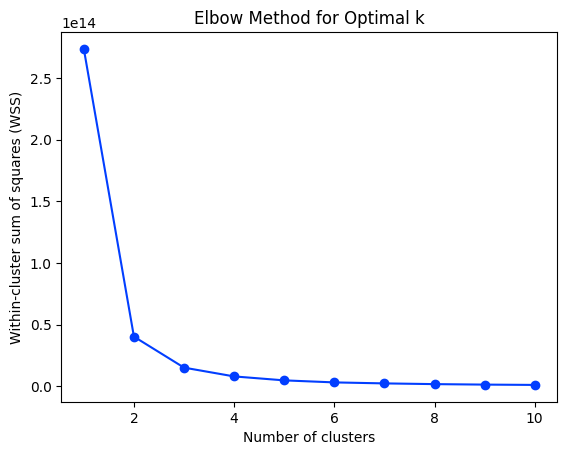

In [73]:
from sklearn.cluster import KMeans

wss = []

for i in range(1, 11):
    cls = KMeans(n_clusters=i, random_state=42)  
    cls.fit(customer_data_pca)  
    wss.append(cls.inertia_) 

plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.show()
#The Elbow Method suggests the optimal number of clusters at the "elbow point" of the plot, where the WSS starts decreasing at a slower rate. This point often represents a balance between minimizing WSS and having a reasonable number of clusters, providing insight into the most appropriate value of k for clustering.

In [74]:
model = KMeans(n_clusters=3, random_state=42)  
model.fit_predict(customer_data11)  
clusters = model.labels_

In [75]:
customer_data_pca['Cluster'] = clusters
customer_data_pca.head()

,PC1,PC2,Cluster
0,-10252.275665,-323.414709,2
1,-10195.562020,-20.665846,2
2,-21353.074699,575.024904,0
3,-27095.912698,160.212419,0
4,32464.196950,-510.086632,1


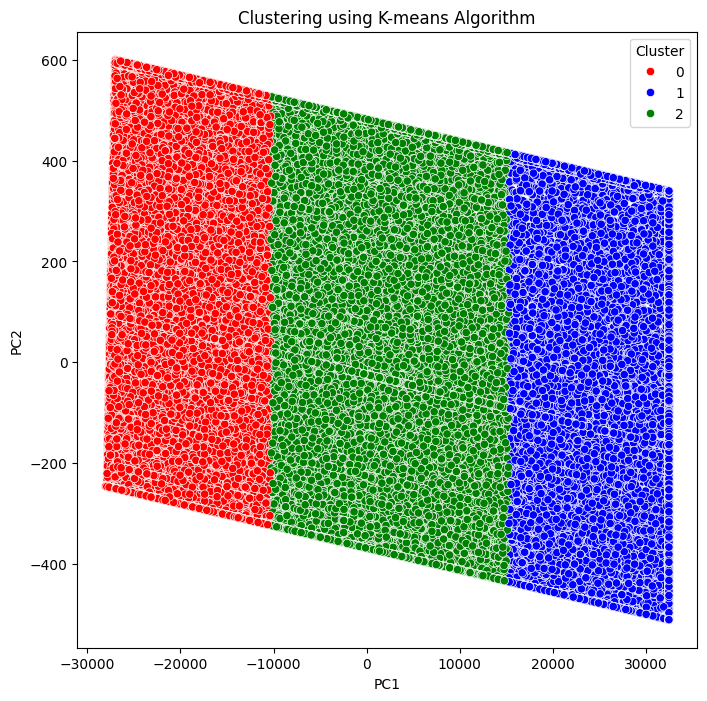

In [76]:
plt.figure(figsize = (8, 8))
ax = sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = customer_data_pca, palette = ['red', 'blue', 'green', 'black'])
plt.title("Clustering using K-means Algorithm")
plt.show()

In [77]:
customer_data11['Clusters'] = clusters
customer_data11.sample(5)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR,Clusters
610402,1,534.11,200.0,29,0.374455,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171277,0,6455.22,379.0,37,0.058712,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505991,1,31751.35,156.0,34,0.001575,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
28480,1,25429.68,264.0,49,0.010382,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
680652,0,21932.05,165.0,41,0.007523,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [78]:
customer_data10.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'BalTransRatio', 'TransactionMonth'],
      dtype='object')

In [79]:
customer_data11['CustLocation'] = customer_data10['CustLocation']

In [80]:
customer_data12 = pd.concat([customer_data10, customer_data11['Clusters']], axis = 1)
customer_data12.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,Clusters
0,0,JAMSHEDPUR,17819.05,156.0,30,0.001403,2,2
2,0,MUMBAI,17874.44,459.0,28,0.025679,2,2
4,0,NAVI MUMBAI,6714.43,1005.9,36,0.262494,2,0
6,0,MUMBAI,973.46,566.0,32,0.581431,2,0
7,1,MUMBAI,60535.93,156.0,42,0.001557,2,1


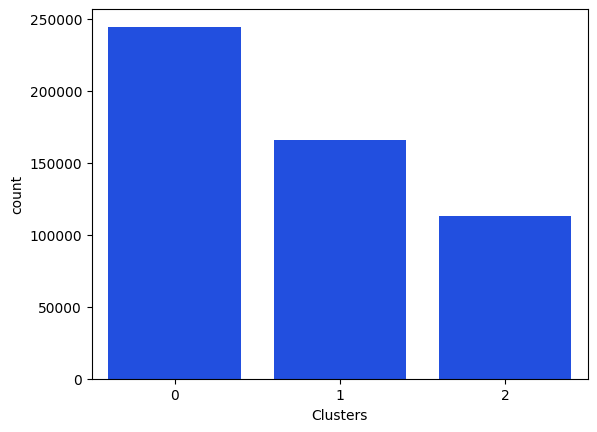

In [81]:
sns.countplot(customer_data12, x = 'Clusters')
plt.show()

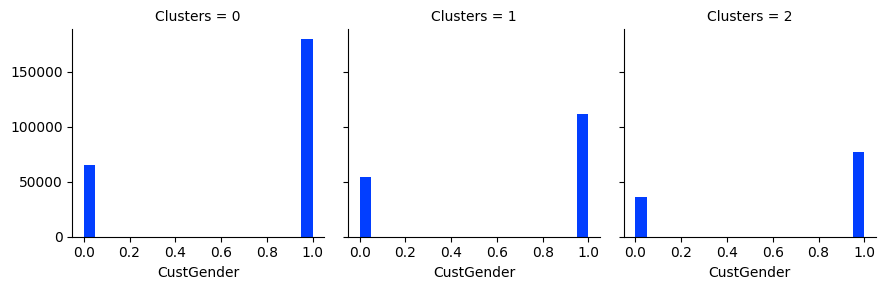

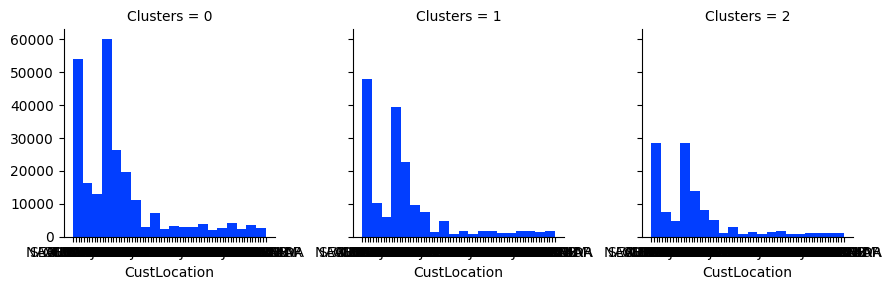

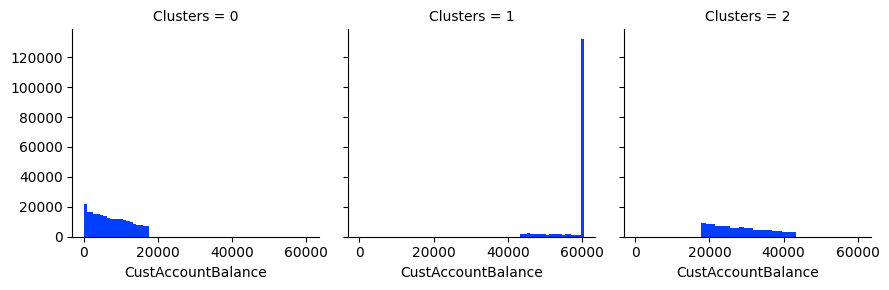

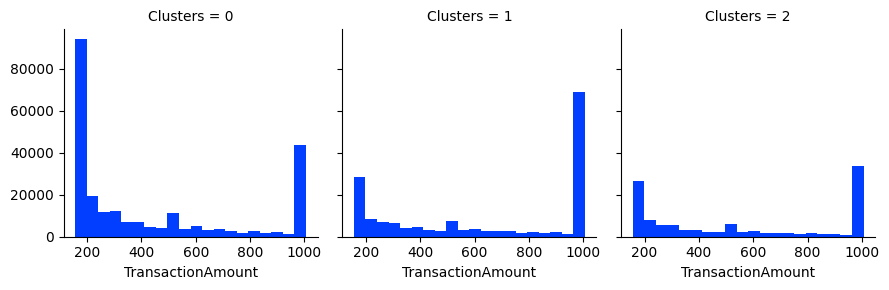

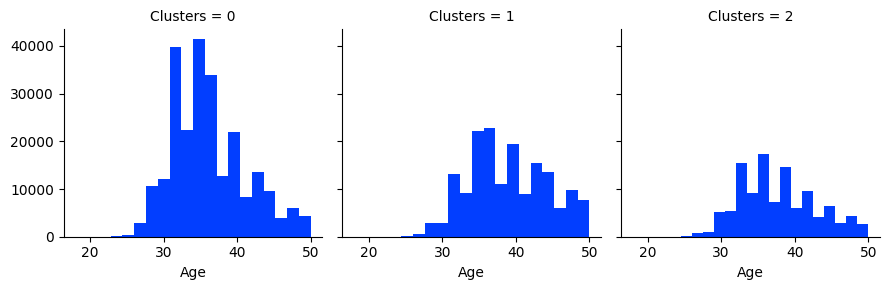

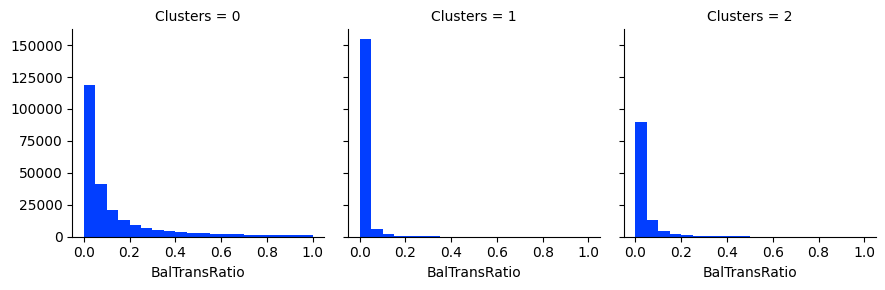

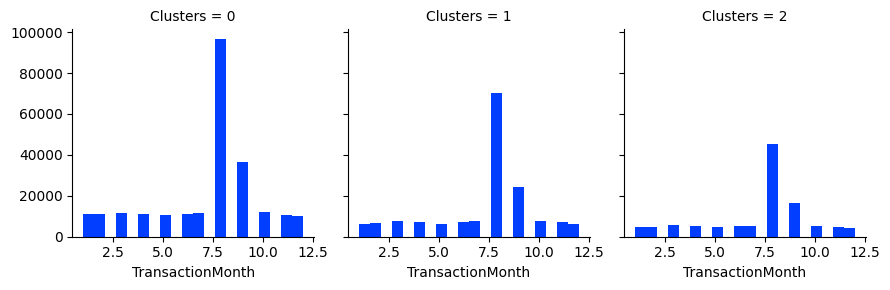

In [82]:
numeric_columns = customer_data12.drop(['Clusters'], axis=1).columns

for c in numeric_columns:
    grid = sns.FacetGrid(customer_data12, col='Clusters')
    grid.map(plt.hist, c, bins=20)  
    plt.xlabel(c)
    plt.show()

In [83]:
import joblib 
joblib.dump(model, 'k_means_model.pkl')

['k_means_model.pkl']

In [84]:
customer_data12.to_csv("clustered_data.csv")

TRAINING AND TESTING MODEL ACCURACY 

In [85]:
#  machine learning models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Import tools for creating pipelines and performing grid search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Import metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

# Import feature selection methods
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Standardization and scaling
from sklearn.preprocessing import StandardScaler

In [91]:
data = pd.read_csv("clustered_data.csv")
data.head()

,Unnamed: 0,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,Clusters
0,0,0,JAMSHEDPUR,17819.05,156.0,30,0.001403,2,2
1,2,0,MUMBAI,17874.44,459.0,28,0.025679,2,2
2,4,0,NAVI MUMBAI,6714.43,1005.9,36,0.262494,2,0
3,6,0,MUMBAI,973.46,566.0,32,0.581431,2,0
4,7,1,MUMBAI,60535.93,156.0,42,0.001557,2,1


In [92]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
data.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'BalTransRatio', 'TransactionMonth', 'Clusters'],
      dtype='object')

In [93]:
X = data.drop(["CustLocation", "Clusters"], axis = 1)
y = data.Clusters

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Feature Selection
selector = SelectKBest(score_func = chi2, k = (data.shape[1]//2))
selector

SelectKBest(k=4, score_func=<function chi2 at 0x0000020F8962F100>)

In [95]:
X_new = selector.fit_transform(X_train, y_train)
selected_features_mask = selector.get_support()
selected_columns = X.columns[selected_features_mask]
selected_columns

Index(['CustAccountBalance', 'TransactionAmount', 'Age', 'BalTransRatio'], dtype='object')

In [96]:
X_test_selected = selector.transform(X_test)
X_test_selected

array([[6.05359300e+04, 8.99000000e+02, 4.60000000e+01, 1.39592155e-02],
       [1.01253600e+04, 1.00590000e+03, 3.50000000e+01, 2.67644805e-01],
       [4.62360000e+02, 1.56000000e+02, 3.20000000e+01, 6.48845056e-02],
       ...,
       [2.15471300e+04, 1.00590000e+03, 4.00000000e+01, 8.52549736e-02],
       [6.05359300e+04, 2.50000000e+02, 3.30000000e+01, 2.67480664e-03],
       [5.06129300e+04, 1.00590000e+03, 3.50000000e+01, 2.76609159e-02]])

In [106]:
# Define models
models = [
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("SVC", SVC(probability=True)),
    ("GaussianNB", GaussianNB())
]


for name, model in models:
    print(f"Training {name}...")
    pipe = Pipeline([
        ('selector', SelectKBest(score_func=chi2, k=(data.shape[1]//2))),
        ('classifier', model)
    ])

    trained = pipe.fit(X_train, y_train)
    y_pred = trained.predict(X_test)

    # Evaluate the model
    print(f"\nResults for {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")

    if len(np.unique(y_test)) == 2:
        y_proba = trained.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve for {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend()
        plt.show()


Training LogisticRegression...

Results for LogisticRegression:
Confusion Matrix:
[[72988     0     2]
 [    0 49775     0]
 [    0     0 33997]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72990
           1       1.00      1.00      1.00     49775
           2       1.00      1.00      1.00     33997

    accuracy                           1.00    156762
   macro avg       1.00      1.00      1.00    156762
weighted avg       1.00      1.00      1.00    156762


Accuracy Score: 0.9999872418060499
Training DecisionTreeClassifier...

Results for DecisionTreeClassifier:
Confusion Matrix:
[[72988     0     2]
 [    0 49775     0]
 [    0     0 33997]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72990
           1       1.00      1.00      1.00     49775
           2       1.00      1.00      1.00     33997

    accuracy     

Standardized Data Sample:
[[-0.16403716 -0.22834528 -1.29090548]
 [-0.1638891  -0.14981232 -1.66628572]
 [-0.19372042  0.08605797 -0.16476476]
 [-0.20906635 -0.13045051 -0.91552524]
 [ 0.04247367 -0.20608824  0.96137597]]


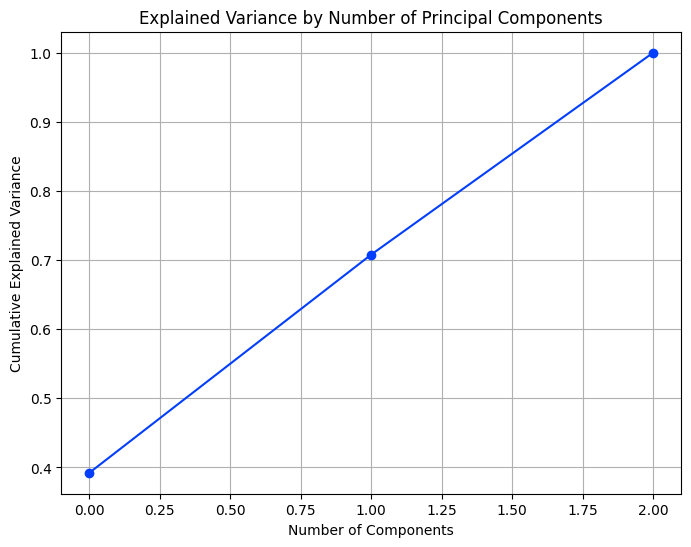

In [107]:
# Scree Plot for PCA Variance
customer_data101 = customer_data5.copy()

numerical_features = ['CustAccountBalance', 'TransactionAmount', 'Age']
data = customer_data101[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("Standardized Data Sample:")
print(scaled_data[:5])

# Scree Plot
pca_full = PCA().fit(scaled_data)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

In [108]:
customer_data5.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
14063,M,BAHADURGARH,2188.37,2016-09-22,121015,1714.62,36
134023,M,MANAMA,794827.88,2016-05-08,131602,4030.49,49
391749,F,CHENNAI,15251.72,2016-08-13,193007,251.00,28


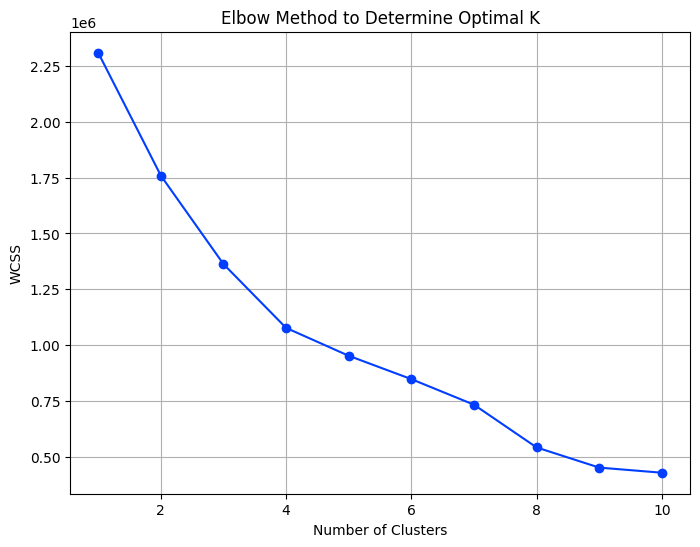

In [109]:
# Elbow Method for Optimal K in K-means
from sklearn.cluster import KMeans

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.grid()
plt.show()
#steep curve followed by a flattening “elbow” suggests the optimal number of components, where most of the variance is captured with minimal components.

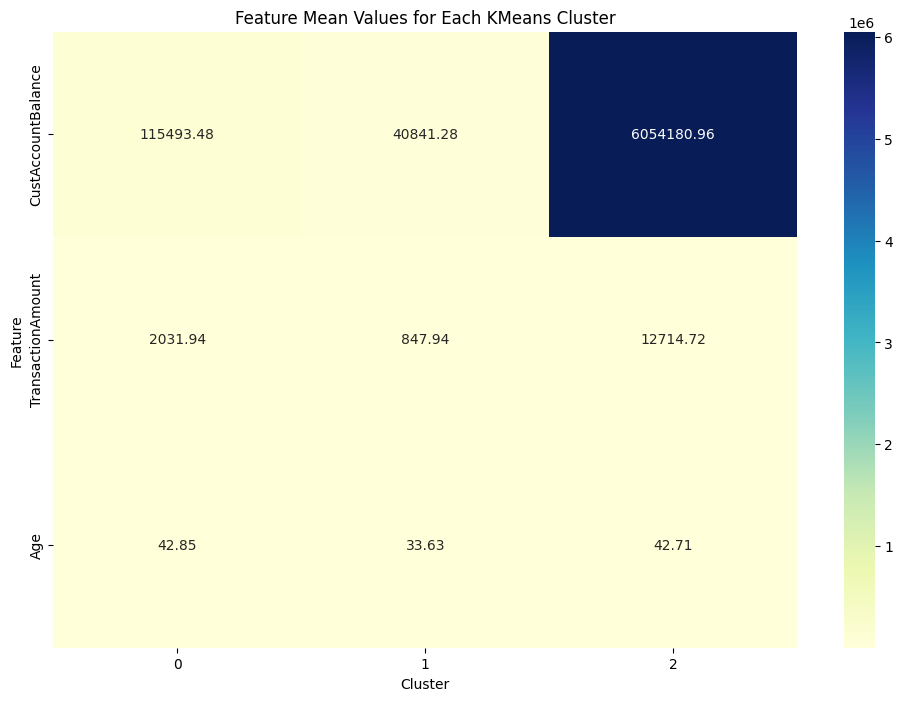

In [110]:
# Heatmap for Cluster Profiles
numerical_features = ['CustAccountBalance', 'TransactionAmount', 'Age']
data = customer_data101[numerical_features]

# Standarize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform K-means clustering
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
customer_data101['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

cluster_means = customer_data101.groupby('KMeans_Cluster')[numerical_features].mean()

#  heatmap for cluster profiles
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Feature Mean Values for Each KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()
#The resulting heatmap provides an intuitive view of the cluster profiles, with each cell’s color intensity representing the average value of a feature within a cluster. This helps to quickly understand how clusters differ in terms of feature values.

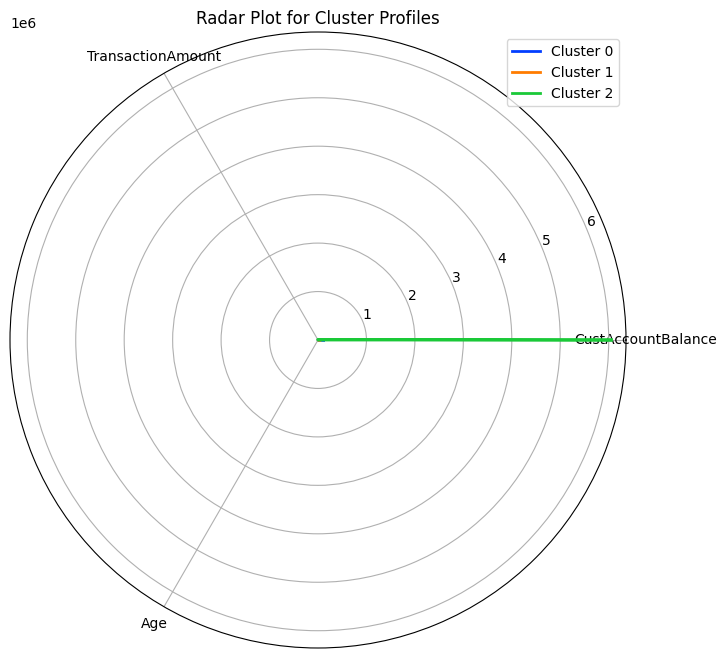

In [111]:
#radar plot
numerical_features = ['CustAccountBalance', 'TransactionAmount', 'Age']
data = customer_data101[numerical_features]

#standarize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
customer_data101['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

#mean value for evry cluster
cluster_means = customer_data101.groupby('KMeans_Cluster')[numerical_features].mean().reset_index()

# CreateRadarPlot
def create_radar_plot(cluster_means):
    num_vars = len(numerical_features)
    #angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # circular so loop start end
    cluster_means = cluster_means[numerical_features].values
    cluster_means = np.concatenate((cluster_means, cluster_means[:, [0]]), axis=1)
    #first value to array end
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    # Draw one axe per feature and add labels
    plt.xticks(angles[:-1], numerical_features)
    for i in range(cluster_means.shape[0]):
        ax.plot(angles, cluster_means[i], linewidth=2, label=f'Cluster {i}')
        ax.fill(angles, cluster_means[i], alpha=0.25)

    plt.title('Radar Plot for Cluster Profiles')
    plt.legend(loc='upper right')
    plt.show()

create_radar_plot(cluster_means)
#This code performs K-Means clustering, calculates mean values for each feature within each cluster, and then creates a radar plot to visualize the feature profiles of each cluster. Here’s a step-by-step explanation

In [ ]:
all accuracy is high, which means the cluster size we chose for kmeans is accurate.
This could be because of smaller sample size but this hives confidence to come up with campaigns for specific cluster members.

In [ ]:
1. Introduction
This report presents the findings and insights from the customer segmentation analysis conducted for Global Bank. The analysis utilized a comprehensive dataset containing demographic, transactional, and geographical information of approximately 770,000 unique customers after data cleaning and processing.

2. Data Quality and Preprocessing
Issues Identified:

Date of Birth Anomalies:

Some dates of birth were found to be unreasonably low or in the future.
Customers with missing dates of birth, current locations, and account balances were identified and addressed.
Gender Imbalance:

The dataset showed a significant gender imbalance with 72% male and 28% female customers.
Geographical Distribution:

Locations with only one transaction were removed, considering them insignificant for clustering purposes.
3. Key Findings
3.1. Demographic Insights:

Gender Distribution:

Male customers: 72%
Female customers: 28%
Notable gender disparity becoming more pronounced from age 36 onward.
Age Group Analysis:

Age 21: Highest mean transaction/balance ratio (~0.326), indicating higher spending relative to available funds.
Younger vs. Older: Age groups 18-25 have higher mean ratios compared to age groups 30-50, suggesting more active financial lives.
3.2. Geographical Insights:

Major Locations:
11 out of 73 cities account for 54% of the bank's customers, with Mumbai, Bangalore, and New Delhi being the major ones.
Understanding customer locations helps in assessing regional economic risks and regulatory changes.
3.3. Behavioral Patterns:

Transaction Analysis:

Average transaction amount: INR 1,574
Spike in transactions observed in August and September.
Account Balance:

Average account balance: INR 115,403
Significant differences in average account balance and transaction amounts between male and female customers, as well as across different age groups.
4. Clustering Results
Three distinct clusters were identified based on customer behavior and demographics:

Cluster 1:

Gender: Predominantly male (3-fold higher than female)
Account Balance: INR 0 - 17,000
Transaction Amount: More frequent transactions
Age: Higher proportion in the 30s
Balance/Transaction Ratio: Low ratios indicating low spending relative to account balance
Cluster 2:

Gender: Male (2-fold higher than female)
Account Balance: INR 37,000 - 60,000
Transaction Amount: Least frequent transactions
Cluster 3:

Gender: Male (2-fold higher than female)
Account Balance: INR 17,000 - 37,000
Transaction Amount: Moderate transaction frequency
5. Recommendations
Gender-Specific Promotions: Create promotions appealing more to female customers to balance gender representation. As capital one research highlighted on the fact that women are frequent purchases of consumer goods, this would enable the bank to coup more on transactional income.




middle:
9.Customer born in 1800 cannot be alive today to make transactions in 2016 and customers can not be born before we reach the year like 2073
22.It is clear that there is an imbalance in the data with most of the individuals coming from male population.
34.It is clear that there is an imbalance in the data with most of the individuals coming from male population.
37.Age Group Analysis:

Age 21: This group has the highest mean transaction/balance ratio of approximately 0.326. This indicates that, on average, individuals in this age group tend to engage in transactions that are about one-third of their balance. This could suggest a higher propensity for spending relative to their available funds compared to other age groups.
General Trends:

Younger vs. Older: Generally, younger age groups (18-25) tend to have higher mean ratios compared to older age groups (30-50). This aligns with expectations that younger individuals might have more active financial lives involving frequent transactions and expenditures.
Financial Behavior Implications:

Spending Patterns: Higher transaction/balance ratios suggest different spending habits. Age groups with higher ratios might benefit from products and services tailored to frequent transactions and digital banking, while those with lower ratios might prefer savings or investment products.
Business Insights:

Global Bank can use this data to tailor marketing strategies and product offerings. For instance, targeting younger age groups with mobile banking solutions or cash management tools could align well with their higher transaction activity.
39:
The disparity in size between males and females, which is threefold, may be attributed to various social or investigatory factors.
41:
11 out of 73 cities provide 54% of the bank's customers. Knowing where the majority of customers are located helps in assessing regional economic risks, regulatory changes, and other factors that could impact business operations.

45:
We had to cut out all the millionares, as 75% if the population is below 60 535.30
46:
We had to cut out all the millionares and other outliers transaction , as 75% if the population is below $860
65:
The data is well scaled, from 0 to 1 all columns so that the PCA can work well 
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    In the resulting Elbow Plot, the "elbow point" (where the WSS curve begins to flatten) suggests the optimal number of clusters. A sharp decrease in WSS followed by smaller decreases indicates that increasing clusters further won’t significantly improve clustering compactness.
